Text(0,0.5,u'Y')

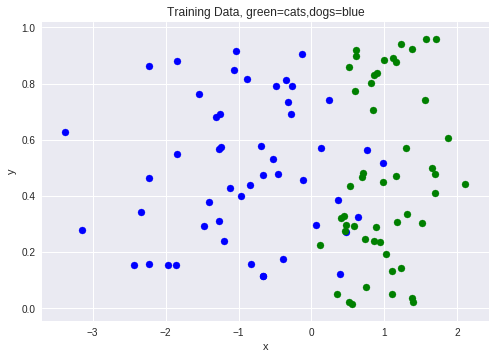

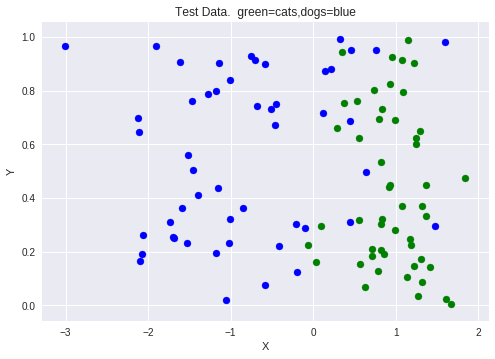

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


#Generate data


#TRAINING SET

dataSize = 50
# Class 1 
dog_data = np.random.rand(3,dataSize)
dog_data[0] = np.random.normal(-1, 1, dataSize)
dog_data[2] = np.ones([1,dataSize])

# Class 2
cat_data = np.random.rand(3,dataSize)
cat_data[0] = np.random.normal(1, 0.5, dataSize)
cat_data[2] = np.zeros([1,dataSize])

total_x = np.append(dog_data[0],cat_data[0])
total_y = np.append(dog_data[1],cat_data[1])
total_l = np.append(dog_data[2],cat_data[2])

data = np.array([total_x, total_y, total_l])


# Plotting data

plt.figure(1)

for i in range(len(data[0])):
    # Note: Prob a better way to do this
    if(data[2,i] == 1):
      plt.scatter(data[0,i],data[1,i],c='b')
    else:
      plt.scatter(data[0,i],data[1,i],c='g')

plt.title('Training Data, green=cats,dogs=blue')
plt.xlabel('x')
plt.ylabel('y')
      
# TEST SET

dataSize_test = 50
# Class 1 
dog_data_test = np.random.rand(3,dataSize)
dog_data_test[0] = np.random.normal(-1, 1, dataSize)
dog_data_test[2] = np.ones([1,dataSize])

# Class 2
cat_data_test = np.random.rand(3,dataSize)
cat_data_test[0] = np.random.normal(1, 0.5, dataSize)
cat_data_test[2] = np.zeros([1,dataSize])

total_x_test = np.append(dog_data_test[0],cat_data_test[0])
total_y_test = np.append(dog_data_test[1],cat_data_test[1])
total_l_test = np.append(dog_data_test[2],cat_data_test[2])


plt.figure(2)

#Plotting data
data_test = np.array([total_x_test, total_y_test, total_l_test])

for i in range(len(data_test[0])):
    # Note: Prob a better way to do this
    if(data_test[2,i] == 1):
      plt.scatter(data_test[0,i],data_test[1,i],c='b')
    else:
      plt.scatter(data_test[0,i],data_test[1,i],c='g')
      
      
plt.title('Test Data.  green=cats,dogs=blue')
plt.xlabel('X')
plt.ylabel('Y')      




Final Error
2.7188934674989826


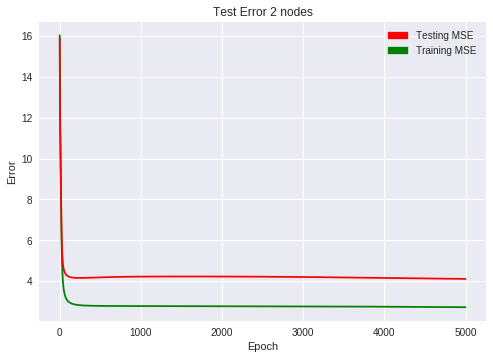

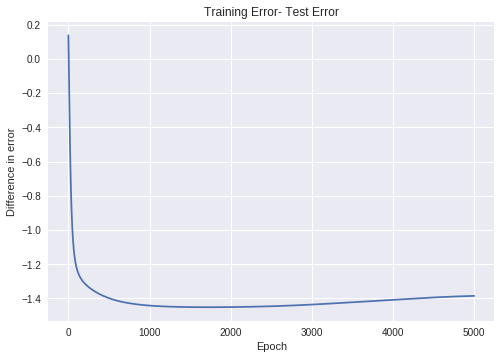

In [9]:
### NEW VERSION, WORKS
epoch = 5000
n_hiddenNodes = 2;
eta=0.05;

#Restructuring data
transData =  np.transpose(data)

dataInput = transData[:,0:2]  #[100,2]    
labels = transData[:,2:3]     #[100,1]

#Restructuring test data
transData_test =  np.transpose(data_test)

dataInput_test = transData_test[:,0:2]  #[100,2]    
labels_test = transData_test[:,2:3]     #[100,1] 

#print(dataInput)
# There are (L+1) X M weights between input and hidden
# There are (M+1) X N weights between hidden and output
L = np.shape(dataInput)[1]
M = n_hiddenNodes
N = np.shape(labels)[1]


weights_hid = np.random.uniform(low=-1, high=1, size=((L+1), n_hiddenNodes)) #  [3,2] (x,y,bias)
weights_out = np.random.uniform(low=-1, high=1, size=((n_hiddenNodes+1),N))  #  [3,1]

dataInput = np.concatenate((dataInput,-np.ones((len(dataInput),1))),axis=1)  # [100,3]
dataInput_test = np.concatenate((dataInput_test,-np.ones((len(dataInput_test),1))),axis=1)
hidden = []
hidden2 = []
output = []
output_signal = []
hidden_n = []
output_n = []
error_storage = np.zeros(epoch)
error_storage_test = np.zeros(epoch)
difference = []
error=np.zeros(2*dataSize)
error_test=np.zeros(2*dataSize)

# Defining the sigmoid function
def sigmoid(value):
  return 1.0/(1.0+np.exp(-1*value))

# Defining function for forward pass
def feedForwardValue(inp):
  
  hidden = np.dot(inp, weights_hid);                                            # [1,2]        [1,3] X [3,2] 
  hidden = sigmoid(hidden)                                                      # [1,2]                           (100 that fired or not in 2 hidden neuron)
  
  hidden2 = [hidden[0],hidden[1],-1]                                            #np.concatenate((hidden,-np.ones((np.shape(inp)[0],1))),axis=0)       #[1,3] # Add the bias column
  
  output = np.dot(hidden2,weights_out)                                          # [100,1]        [100,3] X [3,1]    (100 that fired or not in 1 output neuron)
  output_signal =  sigmoid(output)                                              # [100,1]
  
  return hidden2, output_signal;                                                # [1,3],[1,1]

#Calling forward pass
for i in range(epoch): 
  for k in range(2*dataSize):
    hidden_n,output_n = feedForwardValue(dataInput[k,:])                        # [100,3],[100,1]
    error[k] = (output_n-labels[k])**2*(0.5) 
  
  
  # Calculating deltao  
    deltao = np.multiply(output_n-labels[k],output_n*(1-output_n))              # [100,1]        [1,1] * [100,1]
  
  # Calculating deltah
    
    hidden_n_subtract = np.array([1 - hidden_n[0],1-hidden_n[1], 1- hidden_n[2]])                                              # [100,3]
    derivative =   np.multiply(hidden_n,hidden_n_subtract)                      # [1,3]        [1,3] * [1,3]
    deltah = np.multiply(derivative,np.dot(deltao,np.transpose(weights_out)))   # [1,3]        [1,3] * [1,3]
    
  # Removing the bias-column
  
    deltah_biasRemove = np.delete(deltah, (2), axis=0)                          # [1,2]        Get rid of last column
    dataInputrow = [dataInput[k,:]];
    
  
  # Weight updates
  
    weights_hid -= eta*np.matmul(np.transpose(dataInputrow), [deltah_biasRemove])      # [3,2]          [3,100] X [100,2]
    weights_out -= eta*np.matmul(np.transpose([hidden_n]),[deltao])                   # [3,1]          [3,100] X [100,1]

  #Test error is calculated
    hidden_n_test,output_n_test = feedForwardValue(dataInput_test[k,:]) 
    error_test[k] = np.sum((output_n_test-labels_test[k])**2)*(0.5)
  
  
  error_sum=np.sum(error)
  error_sum_test=np.sum(error_test)
  # Storing errors 
  error_storage[i]=error_sum
  error_storage_test[i]=error_sum_test
  difference.append(error_sum-error_sum_test)
  

 
import matplotlib.patches as mpatches
  
  
# Plotting errors
plt.figure(1)
plt.plot(error_storage, c='g')
plt.title(''+str(n_hiddenNodes)+' nodes')

red = mpatches.Patch(color='red', label='Testing MSE')
green = mpatches.Patch(color='green', label='Training MSE')
plt.legend(handles=[red,green])
#plt.figure(2)

plt.plot(error_storage_test, c='r')
plt.title('Test Error '+str(n_hiddenNodes)+' nodes')
plt.xlabel('Epoch')
plt.ylabel('Error')

plt.figure(3)

plt.plot(difference)
plt.title('Training Error- Test Error')
plt.xlabel('Epoch')
plt.ylabel('Difference in error')


print('Final Error')
print(error_sum)




